In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import metrics
print('Done Importing')

Done Importing


In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_887e8fed66994bce85b726a4b6eee3dd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='UskpKY2fd9iRc08J-8Yw01IefPVS8sBvpG_9cKfPEPfx',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_887e8fed66994bce85b726a4b6eee3dd.get_object(Bucket='dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',Key='dengue_features_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_train= pd.read_csv(body)
df_train.head()



,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [3]:
df_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [4]:
body = client_887e8fed66994bce85b726a4b6eee3dd.get_object(Bucket='dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',Key='dengue_labels_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_label = pd.read_csv(body)
df_label.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
df_label.drop(['city','year','weekofyear'],axis=1,inplace=True)
df_label.head()

,total_cases
0,4
1,5
2,4
3,3
4,6


In [6]:
df=pd.concat([df_train,df_label],axis=1)
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [8]:

body = client_887e8fed66994bce85b726a4b6eee3dd.get_object(Bucket='dengaipredictingdiseasespread-donotdelete-pr-9ljhigmhx6empl',Key='dengue_features_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

features_test = pd.read_csv(body)
features_test.head()



,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [9]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])
features_test['week_start_date'] = pd.to_datetime(features_test['week_start_date'])

In [10]:
def extract_date(df, column):
    df[column+"_day"] = df[column].apply(lambda x: x.day)
    df[column+"_month"] = df[column].apply(lambda x: x.month)

In [11]:
extract_date(df, 'week_start_date')
extract_date(features_test, 'week_start_date')

In [12]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,week_start_date_day,week_start_date_month
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,30,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,7,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,14,5
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,21,5
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,28,5


In [13]:
df.ndvi_ne.isnull().sum()

194

In [18]:
df.replace(np.nan,df.mean(axis=0),inplace=True)
features_test.replace(np.nan,features_test.mean(axis=0), inplace=True)

In [19]:
df.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 27 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysi

In [21]:
df = pd.get_dummies(df, columns=['city'])
features_test = pd.get_dummies(features_test, columns=['city'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 28 columns):
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalys

In [23]:
x = df[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'year', 'weekofyear',
       'week_start_date_day', 'week_start_date_month',
       'city_iq']]

In [24]:
y = df['total_cases']

In [25]:
x=preprocessing.StandardScaler().fit(x).transform(x)

In [30]:
model_1=LinearRegression()
model_2=RandomForestRegressor()
model_3=GradientBoostingRegressor()

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [88]:
model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [89]:
yhat1=model_1.predict(x_test)
yhat2=model_2.predict(x_test)
yhat3=model_3.predict(x_test)

In [90]:
mae = metrics.mean_absolute_error(y_test, yhat1)
mae

19.698436284461646

In [91]:
mae2 = metrics.mean_absolute_error(y_test, yhat2)
mae2

13.138356164383561

In [92]:
mae2 = metrics.mean_absolute_error(y_test, yhat3)
mae2

11.468897907805616

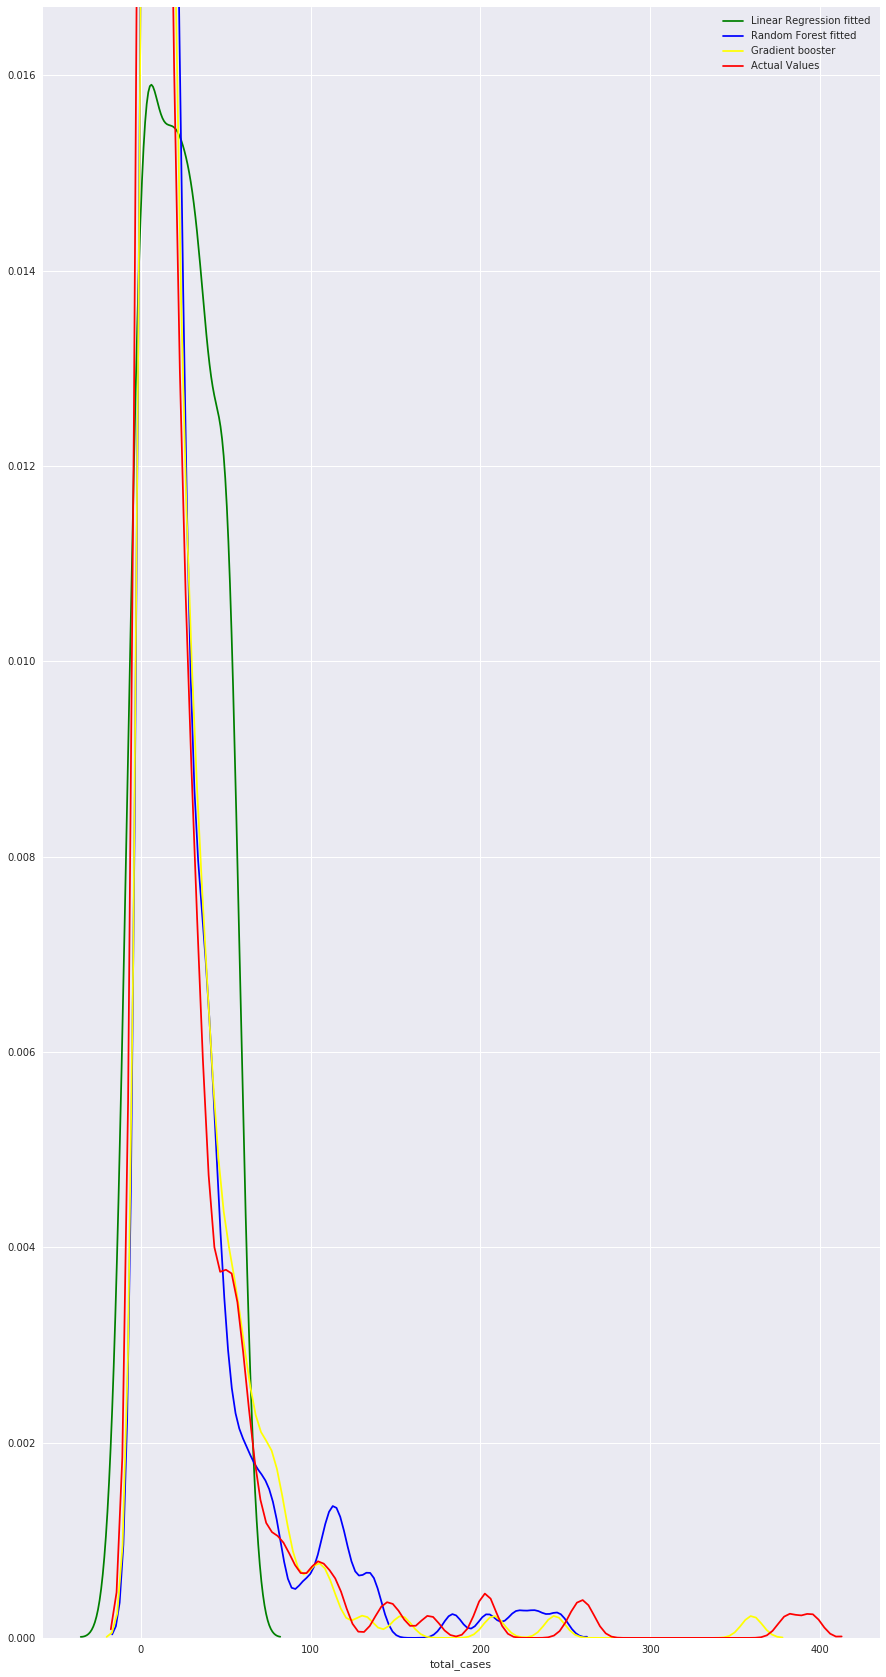

In [48]:
ax1=sns.distplot(yhat1,hist=False,label='Linear Regression fitted',color='green')
ax2=sns.distplot(yhat2,hist=False,label='Random Forest fitted',color='blue')
ax3=sns.distplot(yhat3,hist=False,label='Gradient booster',color='yellow')
sns.distplot(y_test,hist=False,label='Actual Values',color='red',ax=ax3)

In [49]:
features_test.columns

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'week_start_date_day',
       'week_start_date_month', 'city_iq', 'city_sj'],
      dtype='object')

In [93]:
test_x=features_test[['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'week_start_date_day',
       'week_start_date_month', 'city_iq']]

In [99]:
test_x=preprocessing.StandardScaler().fit(test_x).transform(test_x)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [100]:
prediction=model_3.predict(test_x).astype(int)

In [101]:
prediction

array([ 11,   6,   7,  16,  20,   8,  10,  35,  34,  39,   7,  35,  26,
        36,  39,  36,  35,  57,  59,  31,  61,  40,  37,  39,  11,   7,
        47,   9,   6,   6,   6,   6,  14,   6,  46,   6,  38,  15,   7,
        15,  15,  14,   6,  11,   4,   4,  13,   5,   5,  12,  14,   7,
         7,   6,   6,   4,   7,   7,  12,  15,  24,  35,  33,  35,  35,
        33,  35,  35,  43,  57,  43,  33,  39,  33,  57,  57,  57,  35,
        35,  39,   4,  10,  11,  15,  14,  15,  14,   9,  15,  44,   7,
         7,  60,  14,  16,   7,  13,  61,  12,   6,  13,   6,  13,   7,
         6,  23,  11,  13,  23,  36,  36,  36,  13,  33,  36,  13,  28,
         0,  36,  42,  40,  36,  50,  35,  57,  53,  25,  40,  48,  25,
        31,  23,   4,   6,  12,  12,  45,   6,   4,   8,  13,   5,   6,
        68,  58,  14,  15,  13,   3,  12,  10,  41,  14,  15,  13,   5,
        12,  10,   6,   6,  72,   6,   6,   9,  34,  18,   0,   0,  30,
        40,  15,  34,  18,  45,  36,  25,  36,  23,  18,  13,  2

In [103]:
total_cases=pd.DataFrame(prediction)
total_cases.columns=['total_cases']
total_cases.head()

,total_cases
0,11
1,6
2,7
3,16
4,20


In [104]:
df_final=pd.concat([features_test,total_cases],axis=1)
df_final.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date_day,week_start_date_month,city_iq,city_sj,total_cases
0,2008,18,2008-04-29,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,...,26.528571,7.057143,33.3,21.7,75.2,29,4,0,1,11
1,2008,19,2008-05-06,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,...,26.071429,5.557143,30.0,22.2,34.3,6,5,0,1,6
2,2008,20,2008-05-13,-0.00150,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,...,27.928571,7.785714,32.8,22.8,3.0,13,5,0,1,7
3,2008,21,2008-05-20,0.12605,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,...,28.057143,6.271429,33.3,24.4,0.3,20,5,0,1,16
4,2008,22,2008-05-27,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,...,27.614286,7.085714,33.3,23.3,84.1,27,5,0,1,20
